# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
count = 0
set_count = 1
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    params = {
        'q': city,
        'appid': weather_api_key
    }
    
    #Catching non 200 response
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        
        if count < 49:
            count += 1
        else:
            count = 0
            set_count += 1
                
        print(f'Processing Record {count} of Set {set_count} | {city}')
        
        city_name.append(city)
        cloudiness.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(round((data['main']['temp_max'] * (9/5) - 459.67), 2))
        wind_speed.append(round(data['wind']['speed'] * 2.237, 2))
        
    except requests.exceptions.HTTPError as e:
        print(f"City not found. Skipping...")

print("-----------------------------\nData Retrieval Complete\n-----------------------------")
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | lillooet
Processing Record 2 of Set 1 | barrow
City not found. Skipping...
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | ikongo
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | ponta do sol
City not found. Skipping...
Processing Record 7 of Set 1 | pontianak
Processing Record 8 of Set 1 | san quintin
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | marsh harbour
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | inirida
Processing Record 17 of Set 1 | thinadhoo
City not found. Skipping...
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | severo-kurilsk
Processing Record 20 of Set 1 | albany
Processing Record 21 of

Processing Record 38 of Set 4 | esil
Processing Record 39 of Set 4 | watrous
Processing Record 40 of Set 4 | khambhat
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | karlskrona
Processing Record 43 of Set 4 | beisfjord
Processing Record 44 of Set 4 | dungarpur
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | altus
City not found. Skipping...
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | puerto baquerizo moreno
Processing Record 49 of Set 4 | ayan
Processing Record 0 of Set 5 | itaituba
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | paamiut
Processing Record 3 of Set 5 | vostok
Processing Record 4 of Set 5 | vila velha
Processing Record 5 of Set 5 | teguldet
Processing Record 6 of Set 5 | maragheh
Processing Record 7 of Set 5 | tezu
Processing Record 8 of Set 5 | vilhena
Processing Record 9 of Set 5 | la paz
Processing Record 10 of Set 5 | menongue
Processing Record 11 of Set 5 | havel

Processing Record 30 of Set 8 | port blair
Processing Record 31 of Set 8 | illapel
Processing Record 32 of Set 8 | elko
Processing Record 33 of Set 8 | sindor
Processing Record 34 of Set 8 | cockburn town
Processing Record 35 of Set 8 | frumusani
Processing Record 36 of Set 8 | batagay-alyta
Processing Record 37 of Set 8 | lahij
Processing Record 38 of Set 8 | pangai
Processing Record 39 of Set 8 | svetlyy
Processing Record 40 of Set 8 | hofn
Processing Record 41 of Set 8 | libreville
Processing Record 42 of Set 8 | oussouye
Processing Record 43 of Set 8 | teya
Processing Record 44 of Set 8 | road town
Processing Record 45 of Set 8 | victoria
Processing Record 46 of Set 8 | morondava
Processing Record 47 of Set 8 | honningsvag
Processing Record 48 of Set 8 | bemidji
Processing Record 49 of Set 8 | lavrentiya
Processing Record 0 of Set 9 | beidao
Processing Record 1 of Set 9 | san ramon de la nueva oran
Processing Record 2 of Set 9 | ketchikan
Processing Record 3 of Set 9 | shitanjing
P

Processing Record 15 of Set 12 | grootfontein
Processing Record 16 of Set 12 | san cristobal
Processing Record 17 of Set 12 | makhinjauri
Processing Record 18 of Set 12 | carballo
Processing Record 19 of Set 12 | grand-lahou
Processing Record 20 of Set 12 | la baule-escoublac
Processing Record 21 of Set 12 | reconquista
Processing Record 22 of Set 12 | whitehorse
Processing Record 23 of Set 12 | itaueira
Processing Record 24 of Set 12 | noshiro
City not found. Skipping...
Processing Record 25 of Set 12 | ilhabela
Processing Record 26 of Set 12 | aquiraz
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
df_dict = {
    'City': city_name,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Wind Speed': wind_speed
}

df = pd.DataFrame(df_dict)
df.to_csv('Weather_Data.csv', index = False)
df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [24]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lillooet,1,CA,1584335546,45,50.69,-121.94,26.60,10.29
1,barrow,90,US,1584335249,92,71.29,-156.79,17.60,11.41
2,mount gambier,15,AU,1584335255,31,-37.83,140.77,75.20,5.82
3,ikongo,0,MG,1584335546,69,-21.88,47.43,79.05,1.19
4,sao filipe,30,CV,1584335270,75,14.90,-24.50,70.02,18.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

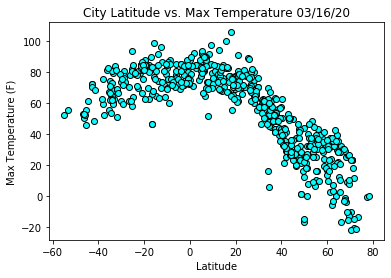

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(df['Lat'], df['Max Temp'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
str_date = datetime.utcfromtimestamp(df.loc[0, 'Date']).strftime('%m/%d/%y')
plt.title(f'City Latitude vs. Max Temperature {str_date}')
plt.show()

plt.savefig('scatter1.png')

The graph is a bit skewed because there are more northern hemisphere data points than southern hemisphere, but you can clearly see a pattern that as you move further away from 0 Latitude (equator), the Max Temp begins to drop.

#### Latitude vs. Humidity Plot

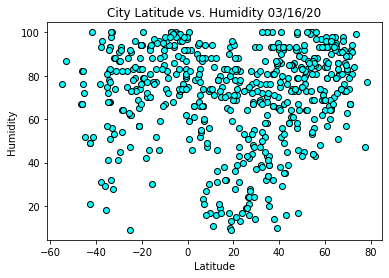

<Figure size 432x288 with 0 Axes>

In [26]:
plt.scatter(df['Lat'], df['Humidity'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs. Humidity {str_date}')
plt.show()
plt.savefig('scatter2.png')

This graph shows that there is no real relationship between Latitude and Humidity.

#### Latitude vs. Cloudiness Plot

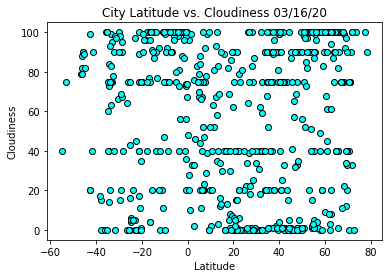

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(df['Lat'], df['Cloudiness'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness {str_date}')
plt.show()
plt.savefig('scatter3.png')

This graph shows that there is no real relationship between Latitude and Cloudiness.

#### Latitude vs. Wind Speed Plot

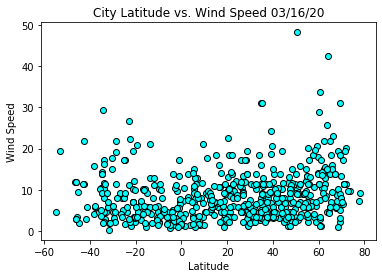

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(df['Lat'], df['Wind Speed'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Latitude vs. Wind Speed {str_date}')
plt.show()
plt.savefig('scatter4.png')

This graph shows that there is no real relationship between Latitude and Wind Speed.

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_regress_line(x_values, y_values):   
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    return {rvalue, line_eq}

In [30]:
# Create Northern and Southern Hemisphere DataFrames
south_df = df[df['Lat'] < 0]
north_df = df[df['Lat'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8890889628606075


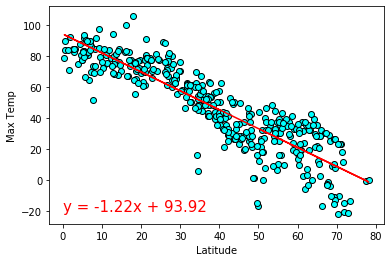

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(north_df['Lat'], north_df['Max Temp'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Max Temp'])
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter5.png')

The linear regression shows a negative correlation between latitude and max temp. As you move further north away from 0 lat, the Max Temp moves torwards a negative value.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.519682514418156


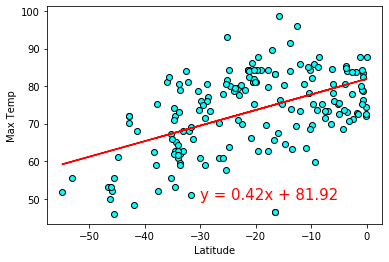

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(south_df['Lat'], south_df['Max Temp'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Max Temp'])
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter6.png')

The linear regression shows a positive correlation between latitude and max temp for the southern hemisphere. As you move towards the equator from the furthest souther point, the max temp moves torwards higher positive values.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.319349168222469


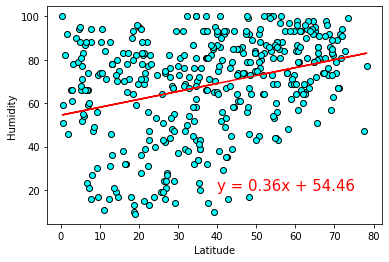

<Figure size 432x288 with 0 Axes>

In [33]:
plt.scatter(north_df['Lat'], north_df['Humidity'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Humidity'])
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter7.png')

The linear regression shows little to no correlation between humidity and latitude in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33861023632082526


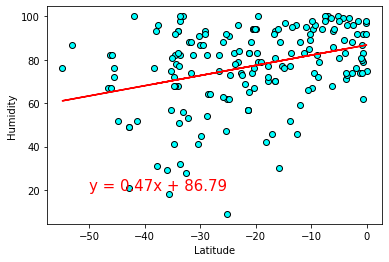

<Figure size 432x288 with 0 Axes>

In [34]:
plt.scatter(south_df['Lat'], south_df['Humidity'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Humidity'])
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter8.png')

The linear regression shows little to no correlation between humidity and latitude in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.20354758294638395


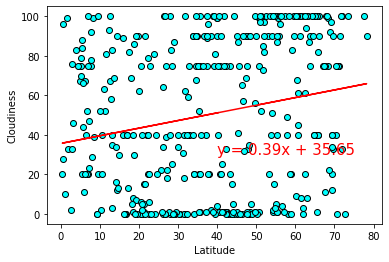

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(north_df['Lat'], north_df['Cloudiness'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Cloudiness'])
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter9.png')

The linear regression shows almost no correlation between cloudiness and latitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1898209344001506


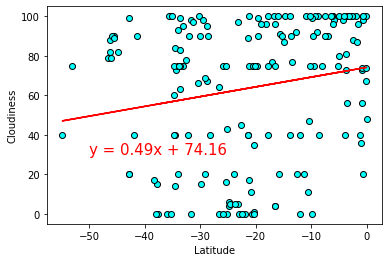

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(south_df['Lat'], south_df['Cloudiness'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Cloudiness'])
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter10.png')

The linear regression shows almost no correlation between cloudiness and latitude in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.22235237057810894


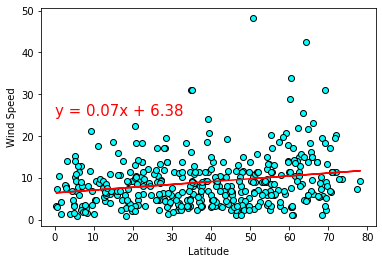

<Figure size 432x288 with 0 Axes>

In [37]:
plt.scatter(north_df['Lat'], north_df['Wind Speed'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
rvalue, line_eq = plot_regress_line(north_df['Lat'], north_df['Wind Speed'])
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter11.png')

The linear regression shows almost no correlation between wind speed and latitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2679184297836321


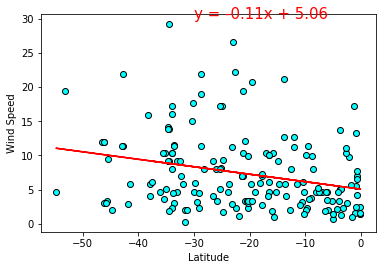

<Figure size 432x288 with 0 Axes>

In [38]:
plt.scatter(south_df['Lat'], south_df['Wind Speed'], facecolors='aqua', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
rvalue, line_eq = plot_regress_line(south_df['Lat'], south_df['Wind Speed'])
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('scatter12.png')

The linear regression shows little to no correlation between wind speed and latitude in the southern hemisphere.

3 trends that I noticed are:
* 1) As you move further north from the equator the max temperature decreases.
* 2) As you move further north torwards the equator the max temperature increases.
* 3) Location has very little impact on cloudiness and wind speed. 